## Import libraries.

Import the necessary libraries.

In [5]:
import random
import math 
import collections
import numpy as np
import matplotlib.pyplot as plt

## Set the size of you EGM cluster.

In [6]:
size = 100

## Define classes and functions.

This is a "classy" version of the EGM generator - meaning that we used a more advanced code, with the definition of  **Node** and **Network** classes. It is slower than the Basic Generator, but it produce a real network, with all the information on coordinates of both the cluster and the cluster frontier. These infos are useful when you want to use cluster and frontier coordinates for some networkish analysis.

In [7]:
# Node Class
class Node:

    # The Node has coordinates, color and a visited status that can be true or false
    def __init__(self, coordinates, color, status, number): 
        self.coordinates = coordinates
        self.color = color
        self.visited = status
        self.number = number

    # This hash function maps the node's coordinates to a unique numeric key    
    def numKey(self):
        x = self.coordinates[0]
        y = self.coordinates[1]
        tmp = (y + ((x+1)/2))
        return x + (tmp * tmp)
    
# Function that takes the node's coordinates from the network (i.e., its key) and returns the key as a string
def networkNodeKey(coordinates):
    return str(coordinates[0]) + ',' + str(coordinates[1])

# Network Class
class Network:

    # The Network is a dictionary of all nodes
    def __init__(self):
        self.nodesDict = {}
    
    # Function that adds a node to the network and assigns its unique coordinates
    def add(self, node):
        key = networkNodeKey(node.coordinates)
        self.nodesDict[key] = node
    
    # Function that returns the value of the inserted key (i.e., the color and status of a node at the x,y coordinates)
    def getNode(self, coordinates):
        key = networkNodeKey(coordinates)
        return self.nodesDict.get(key)

    # Function that checks if a node at the x,y coordinates is present or not in the network
    def contains(self, coordinates):
        coordinateKey = networkNodeKey(coordinates)
        return coordinateKey in self.nodesDict

    def get_all_nodes(self):
        return self.nodesDict.values()

def merge_two_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

def plot_grid(cluster):
    nodes = cluster.get_all_nodes()
    
    # Determine the minimum and maximum x, y coordinates
    min_x = min(node.coordinates[0] for node in nodes)
    max_x = max(node.coordinates[0] for node in nodes)
    min_y = min(node.coordinates[1] for node in nodes)
    max_y = max(node.coordinates[1] for node in nodes)

    # Create a matrix for visualization
    matrix = np.ones((max_y - min_y + 1, max_x - min_x + 1, 3)) # White background
    
    for node in nodes:
        x, y = node.coordinates
        if node.color == 1:  # cluster node
            matrix[max_y - y, x - min_x] = [0.6901960784313725, 0.12549019607843137, 0.8627450980392157]  # Fancy purple
    
    # Mark the seed node with a red dot, if it's in the current view
    if min_x <= 0 <= max_x and min_y <= 0 <= max_y:
        matrix[max_y, -min_x] = [0, 0, 0]  # Black for the seed node

    plt.imshow(matrix)
    plt.axis('off')
    plt.show()

## Run the Model.

Here the code to generate the EGM cluster and frontier network until the target size is reached.

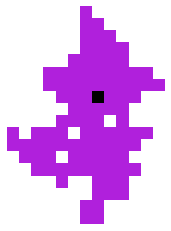

In [23]:
for p in range(0, size):
    cluster_size = size
    
    # Generate the networks
    cluster = Network()  # seed-cluster
    frontier = Network()  # portion of the diamond frontier that borders the seed-cluster

    # Generate the dictionary for neighbors
    neighbors = {}

    # Initialize the first nodes: the central node is black (color 1), the 4 surrounding nodes are blank (color 0)
    node1 = Node([0, 0], 1, True, 0)
    node2 = Node([0, 1], 0, False, 0)
    node3 = Node([1, 0], 0, False, 0)
    node4 = Node([0, -1], 0, False, 0)
    node5 = Node([-1, 0], 0, False, 0)

    # Add nodes to the networks
    cluster.add(node1)
    frontier.add(node2)
    frontier.add(node3)
    frontier.add(node4)
    frontier.add(node5)

for i in range(1, cluster_size):
    
    # Generate the cluster one node at a time
    key_Node = random.choice(list(frontier.nodesDict))

    currentNode = frontier.nodesDict[key_Node]

    key_x = currentNode.coordinates[0]
    key_y = currentNode.coordinates[1]
    key_xy = [key_x, key_y]

    cluster.add(Node(key_xy, 1, True, 0))
    del frontier.nodesDict[key_Node]

    # Frontier block creation process
    up_x = currentNode.coordinates[0] + 1
    up_y = currentNode.coordinates[1]
    neighbors["up"] = [up_x, up_y]
    if (not cluster.contains(neighbors["up"])) and (not frontier.contains(neighbors["up"])):
        frontier.add(Node(neighbors["up"], 0, False, 0))

    down_x = currentNode.coordinates[0] - 1
    down_y = currentNode.coordinates[1]
    neighbors["down"] = [down_x, down_y]
    if (not cluster.contains(neighbors["down"])) and (not frontier.contains(neighbors["down"])):
        frontier.add(Node(neighbors["down"], 0, False, 0))

    left_x = currentNode.coordinates[0]
    left_y = currentNode.coordinates[1] - 1
    neighbors["left"] = [left_x, left_y]
    if (not cluster.contains(neighbors["left"])) and (not frontier.contains(neighbors["left"])):
        frontier.add(Node(neighbors["left"], 0, False, 0))

    right_x = currentNode.coordinates[0]
    right_y = currentNode.coordinates[1] + 1
    neighbors["right"] = [right_x, right_y]
    if (not cluster.contains(neighbors["right"])) and (not frontier.contains(neighbors["right"])):
        frontier.add(Node(neighbors["right"], 0, False, 0))

plot_grid(cluster)